#### Importing Modules

In [4]:
pip install kagglehub seaborn imblearn xgboost catboost scikit-optimize numpy pandas matplotlib seaborn scikit-learn scipy ydata-profiling



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
from pprint import pprint  # Pretty-print for more readable display of data structures
import numpy as np  # For numerical computations and array manipulations
import pandas as pd  # For data manipulation and analysis (DataFrames, series, etc.)
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For creating advanced statistical visualizations (built on matplotlib)
import kagglehub  # For interacting with Kaggle datasets (downloading datasets or competitions)

In [6]:
# Download latest version
path = kagglehub.dataset_download("nikhil1e9/loan-default")
data = pd.read_csv(str(path) + '/Loan_default.csv')
data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


##### Using the function info(), we can check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

Conclusion 1


1.   There are no null values ----> Very good meaning we dont need to fill any missing data points
2.   **Education , EmploymentType , MaritalStatus, HasMortgage, HasDependents, LoanPurpose, HasCosigner** are all categorical data rather than numerical data ---> if we use them we have to change them to numerical(encoded) data one point
3. LoanID can be dropped



In [8]:
data = data.drop(['LoanID'], axis=1)

##### Using the function describe(), we can check the following  values for each numerical feature (column)
- mean
- standard deviation
- maximum
- minimum


In [9]:
data.describe()


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [10]:
# Categorical variables:
categorical_values = ["Default", "Education", "EmploymentType", "MaritalStatus",
            "HasMortgage", "HasDependents", "LoanPurpose", "HasCoSigner"]

In [14]:
# We visualize each of the categorical variables in detail.
print("###"*30)
print(" "*15, f"Categorical variables = {len(categorical_values)}")
print("###"*30)
for value in categorical_values:
  print(f"{value} => {data[value].unique()} => {data[value].nunique()} values")

##########################################################################################
                Categorical variables = 8
##########################################################################################
Default => [0 1] => 2 values
Education => ["Bachelor's" "Master's" 'High School' 'PhD'] => 4 values
EmploymentType => ['Full-time' 'Unemployed' 'Self-employed' 'Part-time'] => 4 values
MaritalStatus => ['Divorced' 'Married' 'Single'] => 3 values
HasMortgage => ['Yes' 'No'] => 2 values
HasDependents => ['Yes' 'No'] => 2 values
LoanPurpose => ['Other' 'Auto' 'Business' 'Home' 'Education'] => 5 values
HasCoSigner => ['Yes' 'No'] => 2 values


In [ ]:
data.describe(include='O')

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255347,255347,255347,255347,255347,255347,255347
unique,4,4,3,2,2,5,2
top,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,64366,64161,85302,127677,127742,51298,127701


## Profiling the data to get a better understanding of whats going on

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Profiling Loan Default Data Report")
profile.to_file("yLoan_Default.html")

/home/nuran/.local/lib/python3.10/site-packages/ydata_profiling/profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 57.02it/s]


Access the profile by opening yLoan_Default.html

### Some Conclusions from the data profiling

This profiling gives a very detailed exploration of the data yet I will focus on one main finding , and the rest further graphs and analysis ( done below) will be needed to draw conclusions

###########################

The data is MASSIVELY IMBALANCED with 

0 (Didnt Default) -------->   	225694
 
1 ( Defaulted)  ------> 29653 

###########################	

## Trying to look for Skewness or Outliers

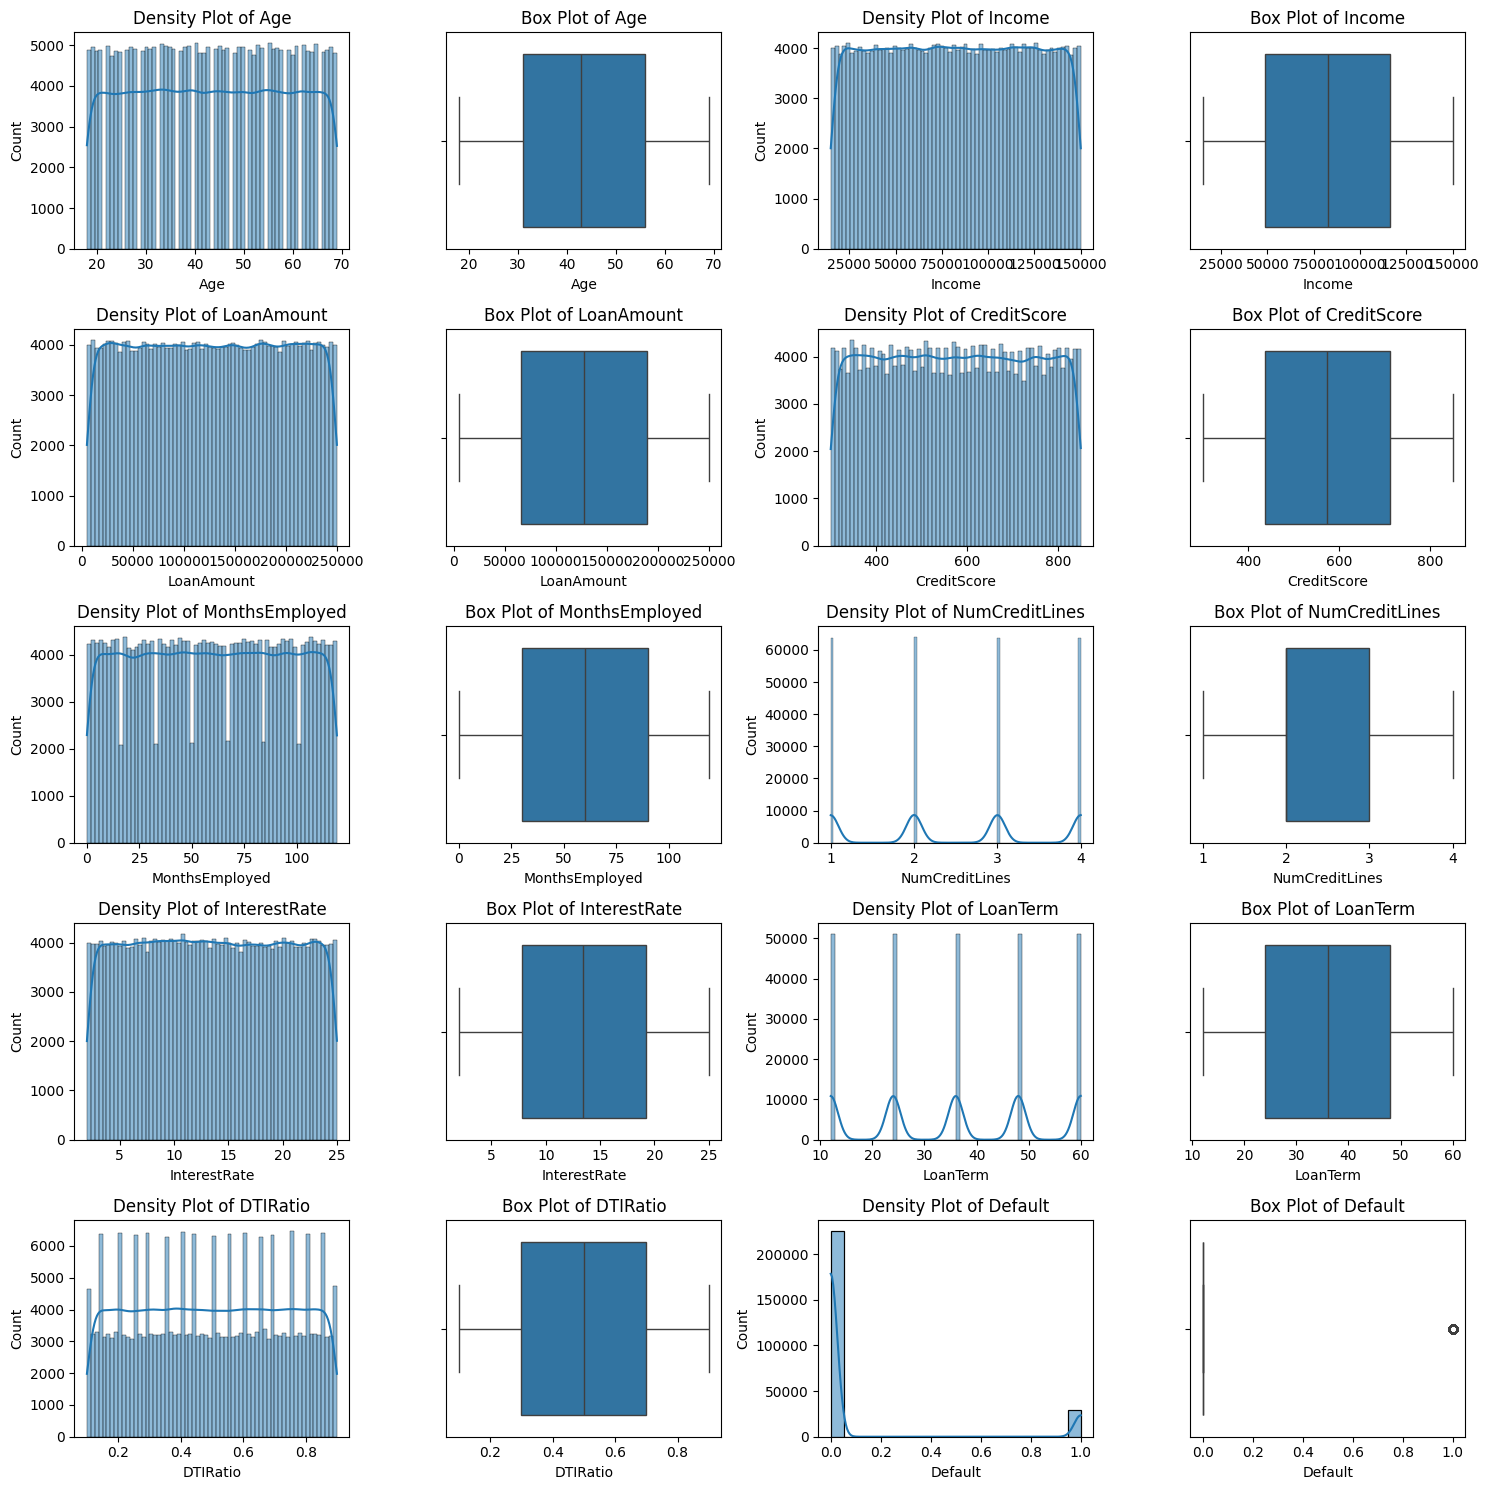

In [ ]:
numerical_columns = data.select_dtypes(include=['number']).columns

# Number of numerical columns
num_cols = len(numerical_columns)

# Calculate the grid size for subplots
rows = (num_cols + 1) // 2  # Two plots per row
cols = 2  # Two columns (Density Plot and Box Plot)

fig, axes = plt.subplots(rows, cols * 2, figsize=(15, rows * 3))  # Adjust `figsize` for better scaling
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through numerical columns and plot
for i, col in enumerate(numerical_columns):
    # Density Plot
    sns.histplot(removeNA_df[col], kde=True, ax=axes[i * 2])  # Adjusted to `sns.histplot` as `sns.distplot` is deprecated
    axes[i * 2].set_title(f'Density Plot of {col}')
    
    # Box Plot
    sns.boxplot(x=data[col], ax=axes[i * 2 + 1])
    axes[i * 2 + 1].set_title(f'Box Plot of {col}')

# Hide any unused subplots
for j in range(i * 2 + 2, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Conclusion 2 

There are no outliers or skewnwss in the data

#### Checking the relationship between categorical features and the target classes

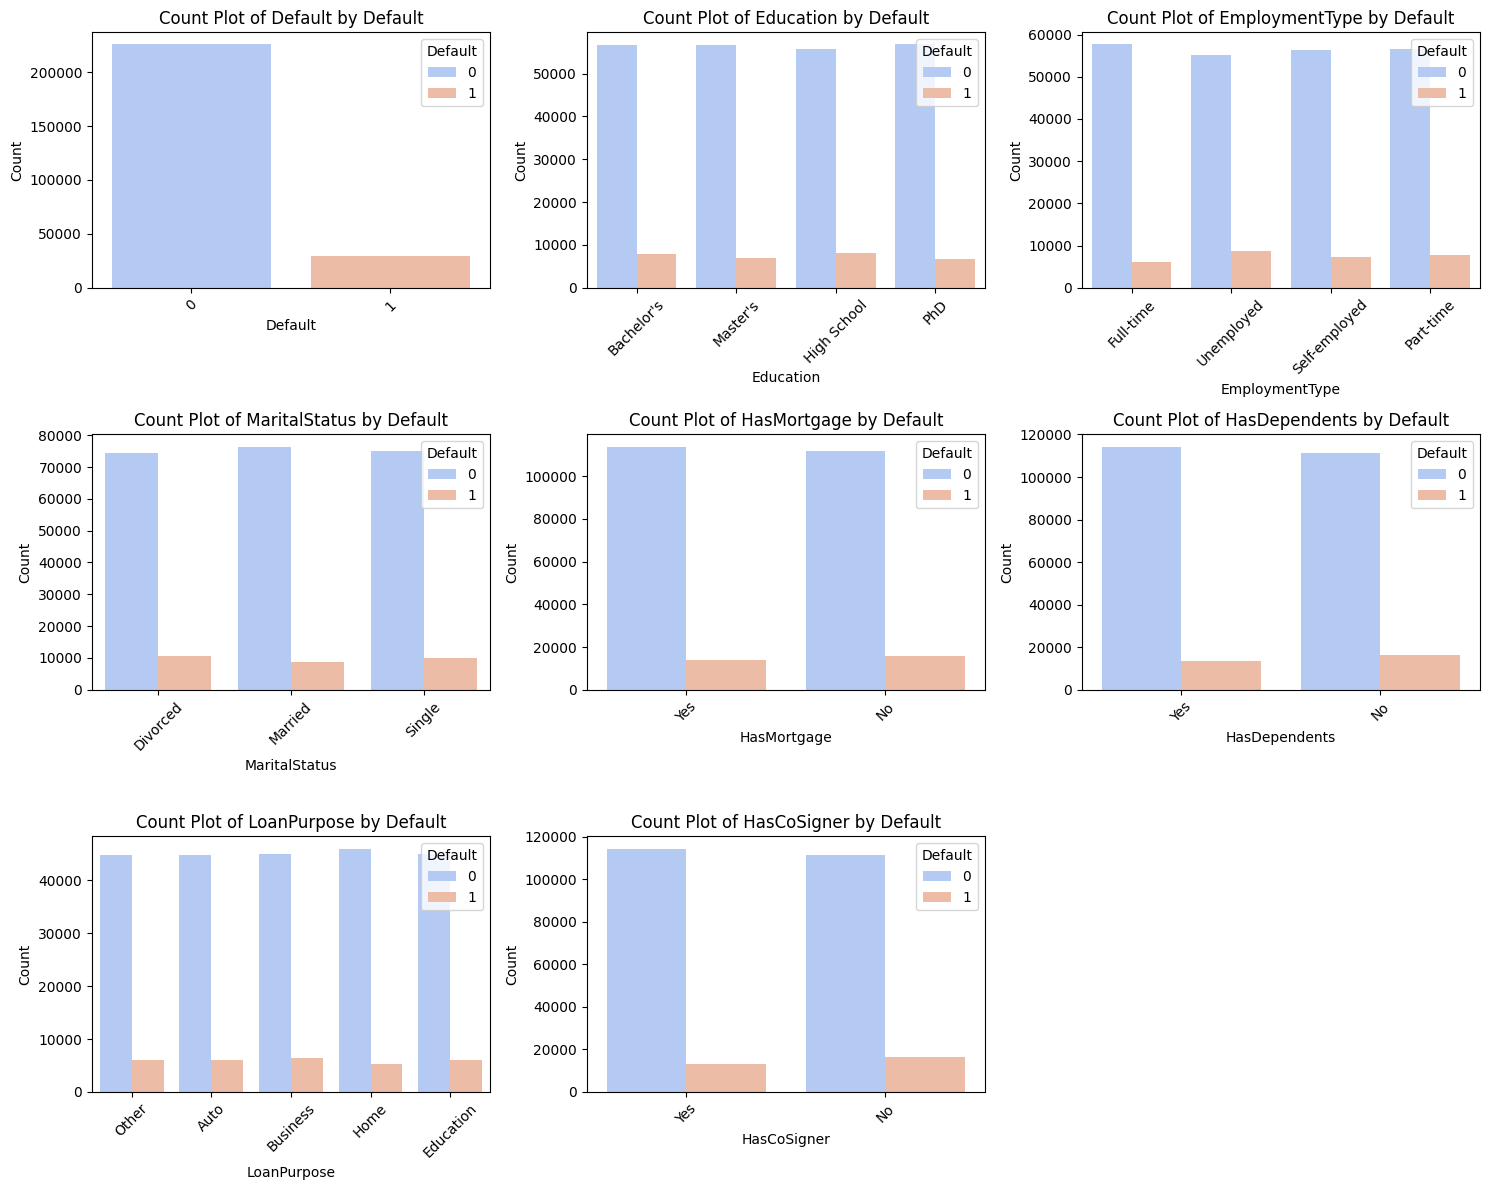

In [ ]:
# Number of categorical columns
num_cats = len(categorical_values)

# Calculate the grid size for subplots
rows = (num_cats + 2) // 3  # Three plots per row
cols = 3  # Number of columns

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Adjust `figsize` for scaling
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through categorical columns and plot
for i, feature in enumerate(categorical_values):
    sns.countplot(data=data, x=feature, hue='Default', palette="coolwarm", ax=axes[i])
    axes[i].set_title(f"Count Plot of {feature} by Default")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Trying to visibly understand the correlations between each feature and the target classes

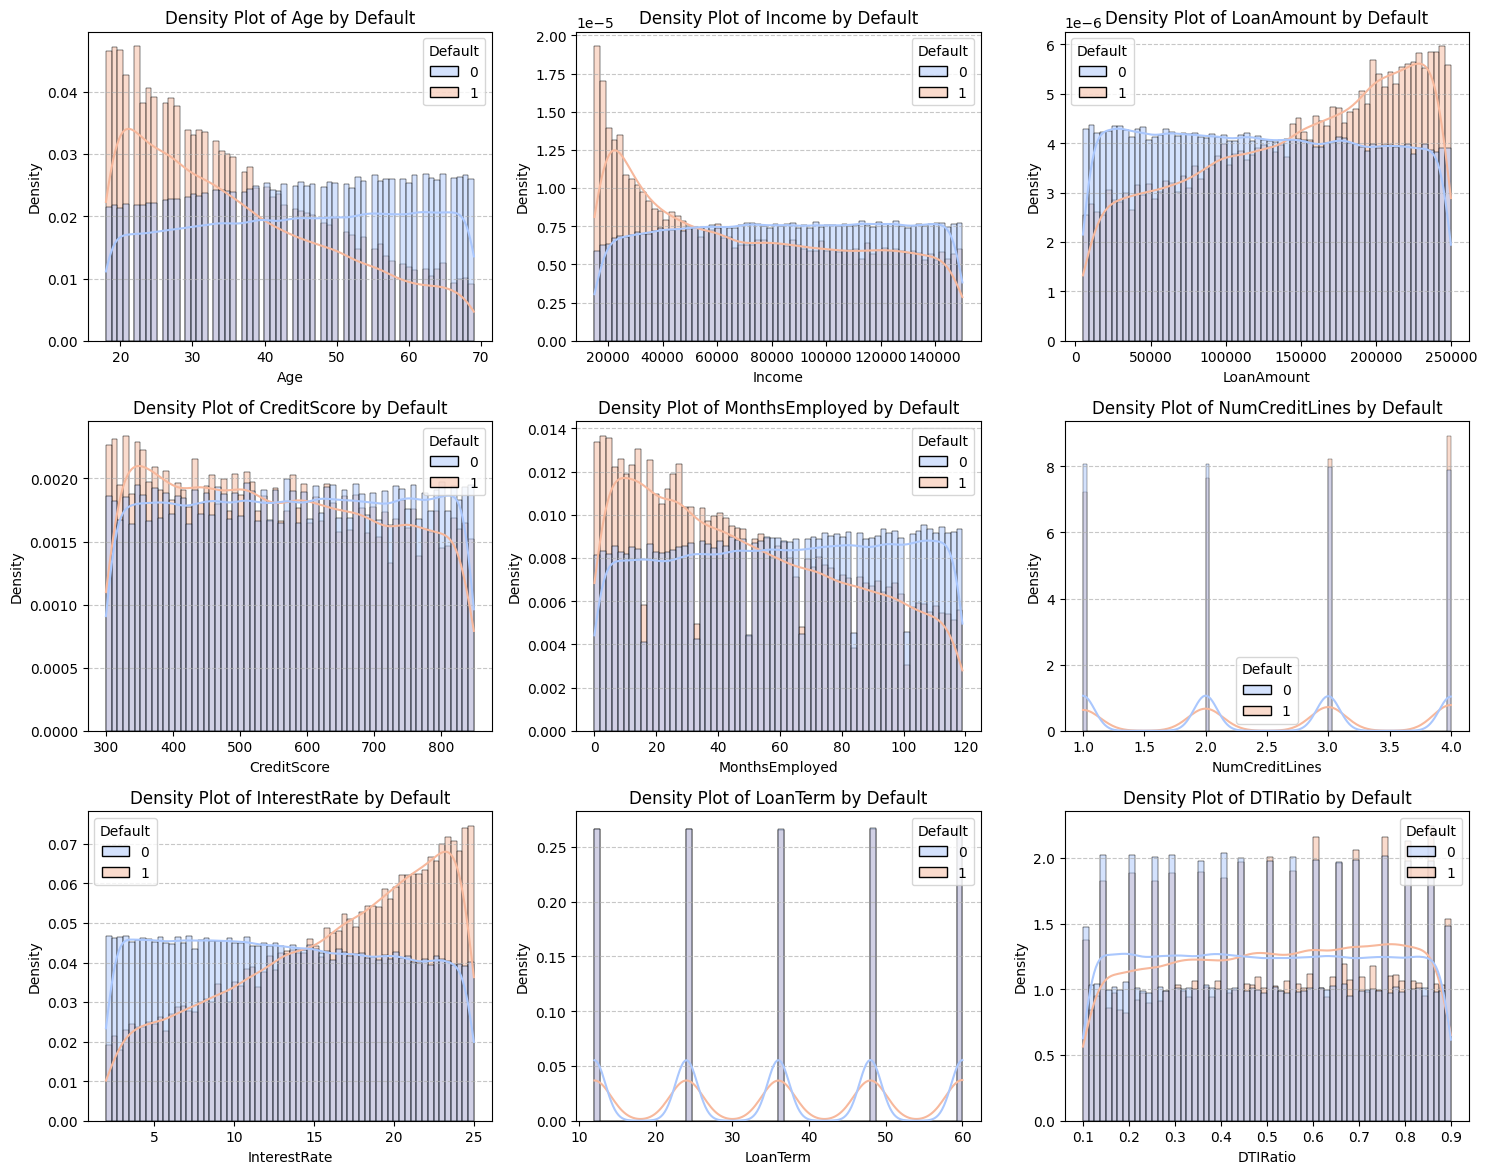

In [ ]:
# Number of numerical columns excluding 'Default'
features_to_plot = [feature for feature in numerical_columns if feature != 'Default']
num_features = len(features_to_plot)

# Calculate the grid size for subplots
rows = (num_features + 2) // 3  # Three plots per row
cols = 3  # Number of columns

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Adjust `figsize` for better scaling
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through features and plot
for i, feature in enumerate(features_to_plot):
    sns.histplot(data=data, x=feature, hue='Default', kde=True, stat="density", 
                 palette="coolwarm", common_norm=False, ax=axes[i])
    axes[i].set_title(f"Density Plot of {feature} by Default")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Density")
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Some Conclusions ( These are just some observations):

1. Younger ages tend to default more
2. Low Income tends to deafult more
3. Higher Loan Amounts tend to default more
4. Less months employed tend to default more
5. Higher Interest Rates tend to deafult more

#### Trying to see correlation between each target class and the features

Checking for the loans that DIDNT default first

In [ ]:
# Filter data where Default = 0
default_0_data = data[data['Default'] == 0]


In [ ]:
# Summary for numerical features
numerical_summary = default_0_data.describe()

# Summary for categorical features
categorical_summary = {}
for feature in categorical_values:
    categorical_summary[feature] = default_0_data[feature].value_counts(normalize=True)

# Display numerical summary
print("Numerical Summary:")
print(numerical_summary)

# Display categorical summary
print("\nCategorical Summary:")
for feature, counts in categorical_summary.items():
    print(f"\nFeature: {feature}")
    print(counts)


Numerical Summary:
                 Age         Income     LoanAmount    CreditScore  \
count  225694.000000  225694.000000  225694.000000  225694.000000   
mean       44.409962   83899.165995  125353.656017     576.232270   
std        14.889574   38498.801232   70708.101479     158.849404   
min        18.000000   15000.000000    5001.000000     300.000000   
25%        32.000000   50994.000000   63889.250000     439.000000   
50%        45.000000   84237.500000  124236.000000     577.000000   
75%        57.000000  117186.750000  186177.750000     714.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   225694.000000   225694.000000  225694.000000  225694.000000   
mean        60.764721        2.489566      13.176994      36.022544   
std         34.556394        1.116350       6.612265      16.966374   
min          0.000000        1.000000       2.000000      12.000000   
25% 

/tmp/ipykernel_24887/3776797961.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=default_0_data, x=feature, palette='coolwarm', ax=axes[i])
/tmp/ipykernel_24887/3776797961.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=default_0_data, x=feature, palette='coolwarm', ax=axes[i])
/tmp/ipykernel_24887/3776797961.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=default_0_data, x=feature, palette='coolwarm', ax=axes[i])
/tmp/ipykernel_24887/3776797961.py:14: FutureWarning: 

Passing `palette` without assigning `h

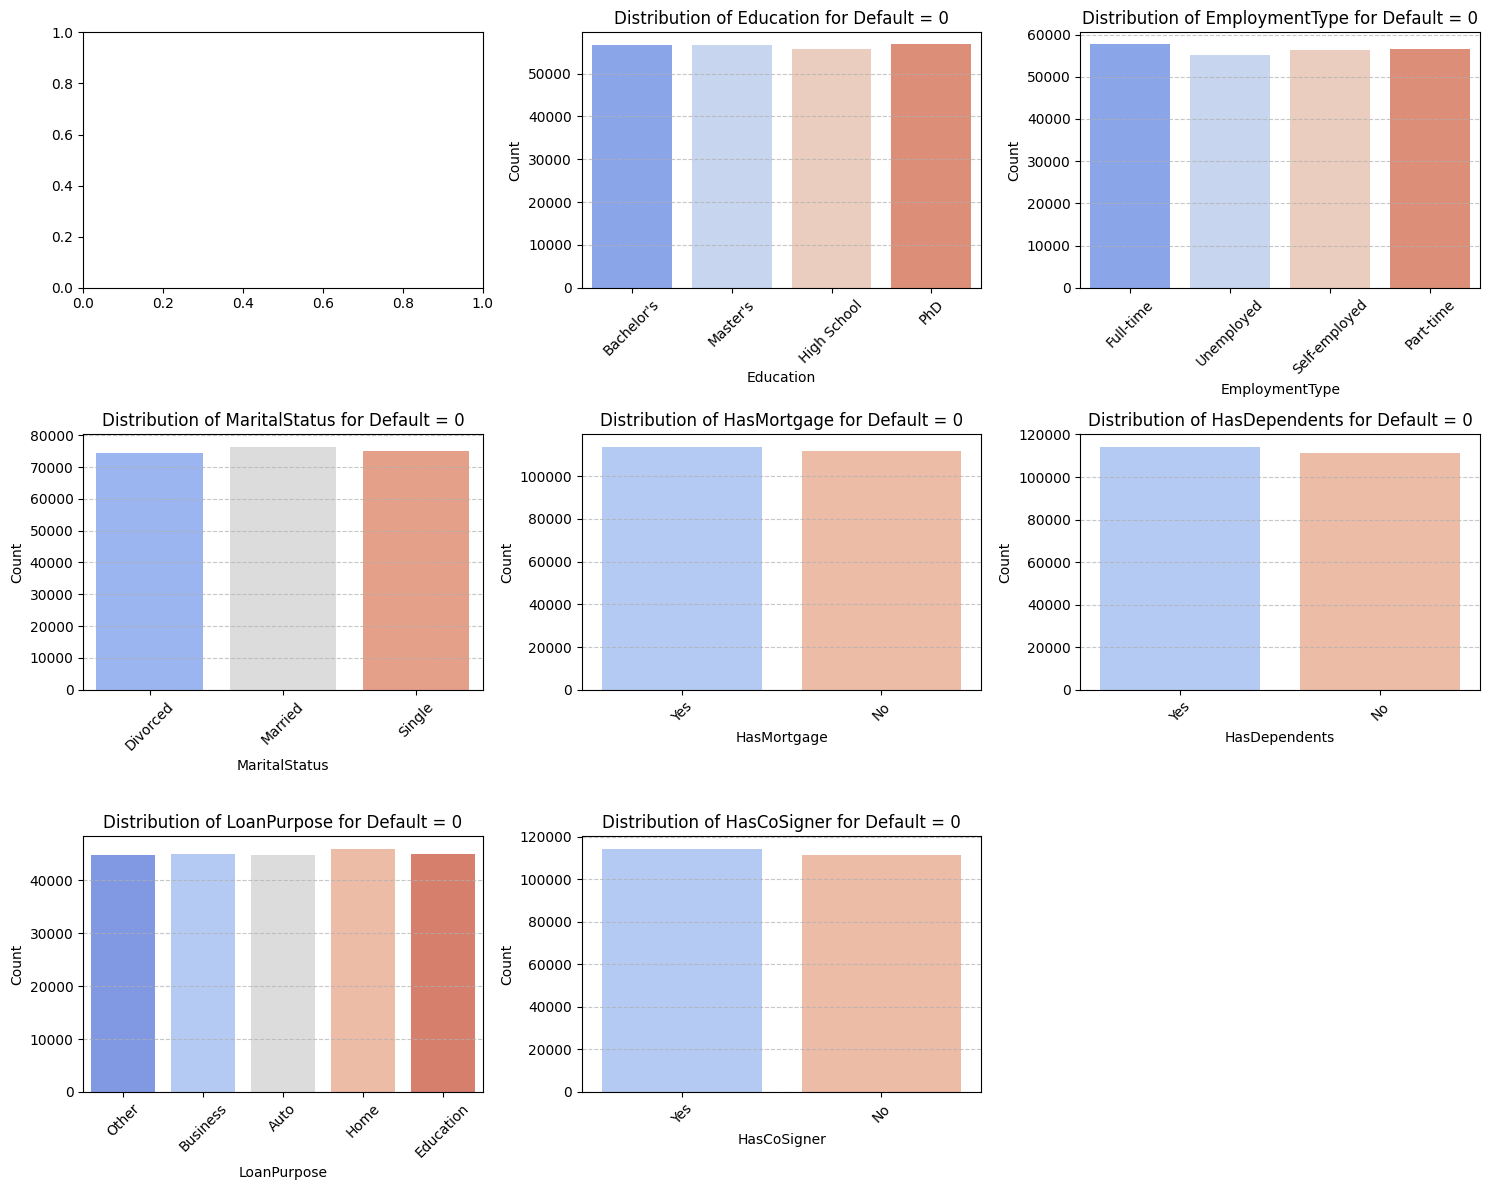

In [ ]:
# Number of categorical features
num_cats = len(categorical_values)

# Calculate the grid size for subplots
rows = (num_cats + 2) // 3  # Three plots per row
cols = 3  # Number of columns

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Adjust `figsize` for better scaling
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through categorical features and plot
for i, feature in enumerate(categorical_values):
    if feature != 'Default':
        sns.countplot(data=default_0_data, x=feature, palette='coolwarm', ax=axes[i])
        axes[i].set_title(f"Distribution of {feature} for Default = 0")
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Some Conclusions:

There is not much variation between the unique value of the featuires and tehir impact on the loan NOT defaulting

#### Doing the same for loans that defaulted

In [ ]:
# Filter data where Default = 1
default_1_data = data[data['Default'] == 1]

In [ ]:
# Summary for numerical features
numerical_summary = default_1_data.describe()

# Summary for categorical features
categorical_values = default_1_data.select_dtypes(include=['object', 'category']).columns
categorical_summary = {}
for feature in categorical_values:
    categorical_summary[feature] = default_1_data[feature].value_counts(normalize=True)

# Display numerical summary
print("Numerical Summary:")
print(numerical_summary)

# Display categorical summary
print("\nCategorical Summary:")
for feature, counts in categorical_summary.items():
    print(f"\nFeature: {feature}")
    print(counts)


Numerical Summary:
                Age         Income     LoanAmount   CreditScore  \
count  29653.000000   29653.000000   29653.000000  29653.000000   
mean      36.559539   71844.722659  144515.311469    559.286143   
std       13.897468   40785.099507   69547.822943    158.521855   
min       18.000000   15004.000000    5000.000000    300.000000   
25%       25.000000   34022.000000   88085.000000    421.000000   
50%       34.000000   66566.000000  152672.000000    553.000000   
75%       47.000000  106895.000000  205468.000000    693.000000   
max       69.000000  149995.000000  249993.000000    849.000000   

       MonthsEmployed  NumCreditLines  InterestRate      LoanTerm  \
count    29653.000000    29653.000000  29653.000000  29653.000000   
mean        50.235457        2.588338     15.896227     36.051394   
std         33.882499        1.118258      6.320304     16.992077   
min          0.000000        1.000000      2.000000     12.000000   
25%         21.000000        2.0

Checking the Modes too for the numerical values

In [ ]:
# Calculate summary for numerical features
numerical_features = default_1_data.select_dtypes(include=['number']).columns
numerical_summary = {}

for feature in numerical_features:
    mode_value = default_1_data[feature].mode().iloc[0]  # Safely get the mode
    numerical_summary[feature] = {
        "Mean": default_1_data[feature].mean(),
        "Median": default_1_data[feature].median(),
        "Std Dev": default_1_data[feature].std(),
        "Mode": mode_value,
        "Min": default_1_data[feature].min(),
        "Max": default_1_data[feature].max()
    }

# Convert to a DataFrame for readability
numerical_summary_df = pd.DataFrame(numerical_summary).T

# Display the numerical summary
print("Numerical Summary with Modes:")
print(numerical_summary_df)


Numerical Summary with Modes:
                         Mean     Median       Std Dev       Mode      Min  \
Age                 36.559539      34.00     13.897468      22.00     18.0   
Income           71844.722659   66566.00  40785.099507   15293.00  15004.0   
LoanAmount      144515.311469  152672.00  69547.822943  122914.00   5000.0   
CreditScore        559.286143     553.00    158.521855     513.00    300.0   
MonthsEmployed      50.235457      46.00     33.882499       3.00      0.0   
NumCreditLines       2.588338       3.00      1.118258       4.00      1.0   
InterestRate        15.896227      16.93      6.320304      24.42      2.0   
LoanTerm            36.051394      36.00     16.992077      60.00     12.0   
DTIRatio             0.512467       0.52      0.229160       0.67      0.1   
Default              1.000000       1.00      0.000000       1.00      1.0   

                     Max  
Age                 69.0  
Income          149995.0  
LoanAmount      249993.0  
Cre

/tmp/ipykernel_24887/591298930.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=default_1_data, x=feature, palette='coolwarm', ax=axes[i])
/tmp/ipykernel_24887/591298930.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=default_1_data, x=feature, palette='coolwarm', ax=axes[i])
/tmp/ipykernel_24887/591298930.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=default_1_data, x=feature, palette='coolwarm', ax=axes[i])
/tmp/ipykernel_24887/591298930.py:13: FutureWarning: 

Passing `palette` without assigning `hue` 

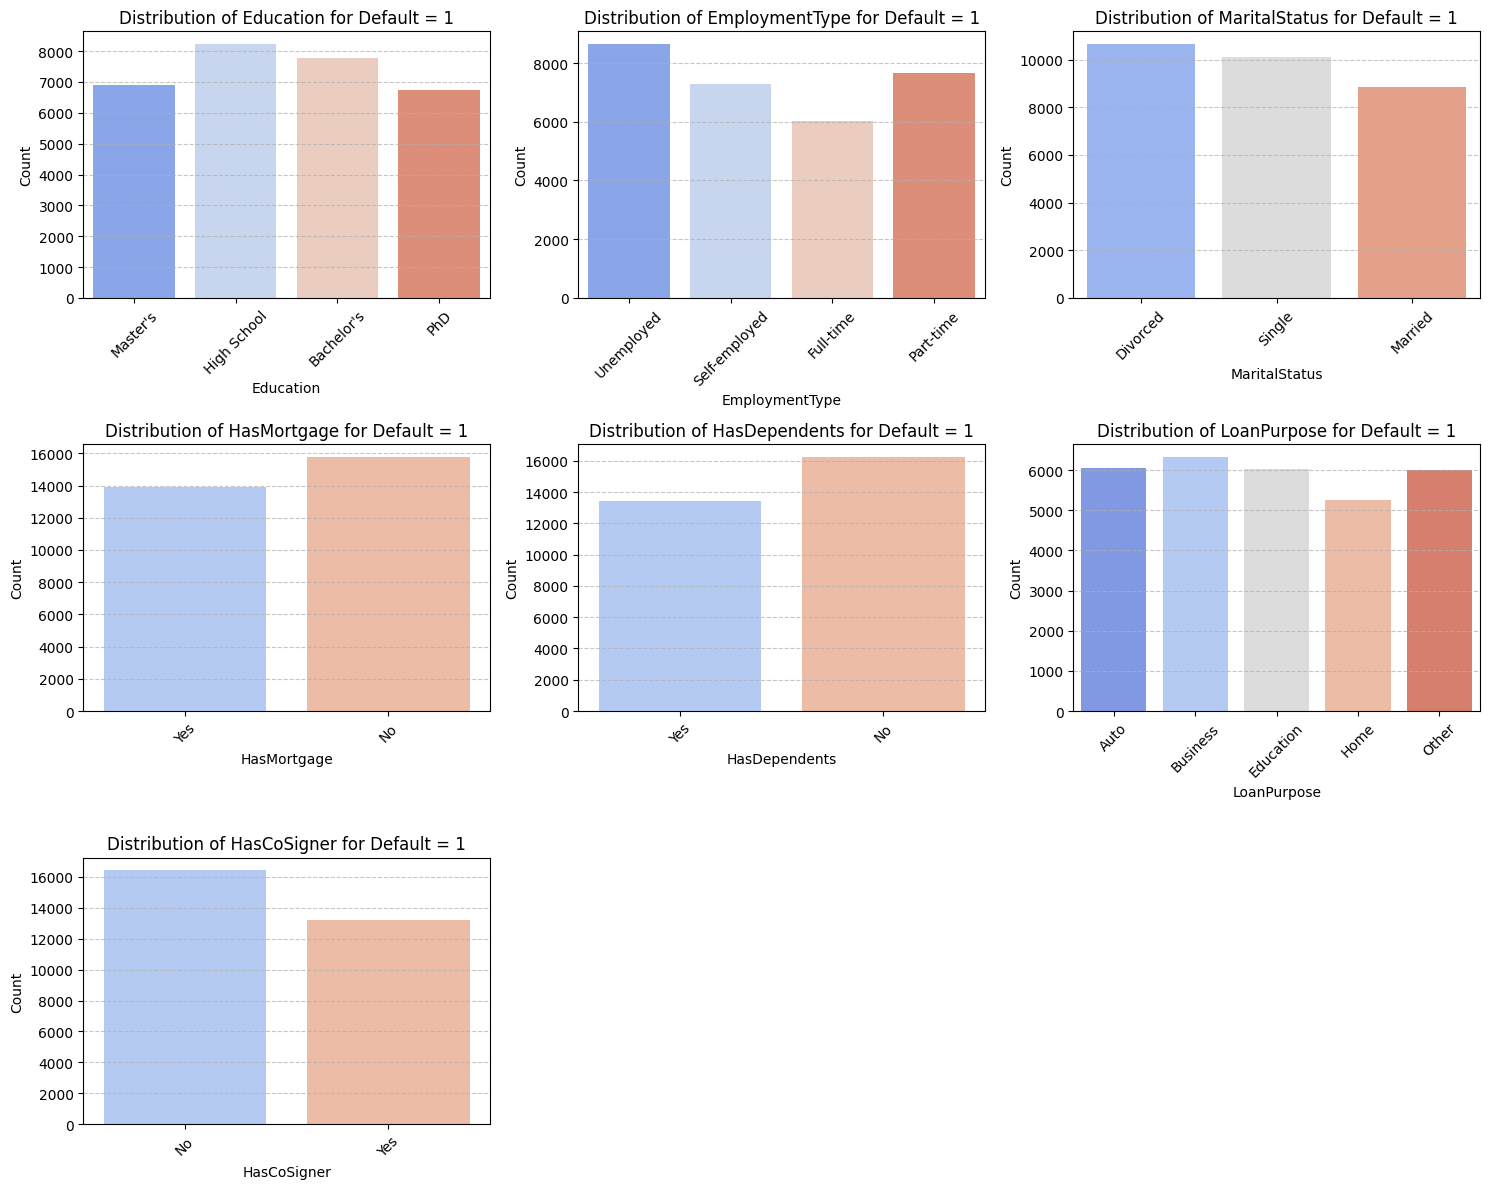

In [ ]:
# Number of categorical features
num_cats = len(categorical_values)

# Calculate the grid size for subplots
rows = (num_cats + 2) // 3  # Three plots per row
cols = 3  # Number of columns

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Adjust `figsize` for scaling
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through categorical features and plot
for i, feature in enumerate(categorical_values):
    sns.countplot(data=default_1_data, x=feature, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f"Distribution of {feature} for Default = 1")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Conclusion:
Here we see taht some uniques values for the cateogrical features have more of an impact than on the loans that DIDNT default thus are creucial for the data

### Trying to understand which features have a higher impact on the the loan defaulting and which don't

Here we are trying to see side by side the effect each feature has one the target feature, the more the graphs are alike the more unimportant this feature is to the wether or not the loan will default

/tmp/ipykernel_24887/3297166945.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="Default", y=col, ax=axes[i], palette="coolwarm", inner="quartile")
/tmp/ipykernel_24887/3297166945.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="Default", y=col, ax=axes[i], palette="coolwarm", inner="quartile")
/tmp/ipykernel_24887/3297166945.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="Default", y=col, ax=axes[i], palette="coolwarm", inner="quartile")
/tmp/ipykernel_24887/3297166945.py:7: Futur

IndexError: index 9 is out of bounds for axis 0 with size 9

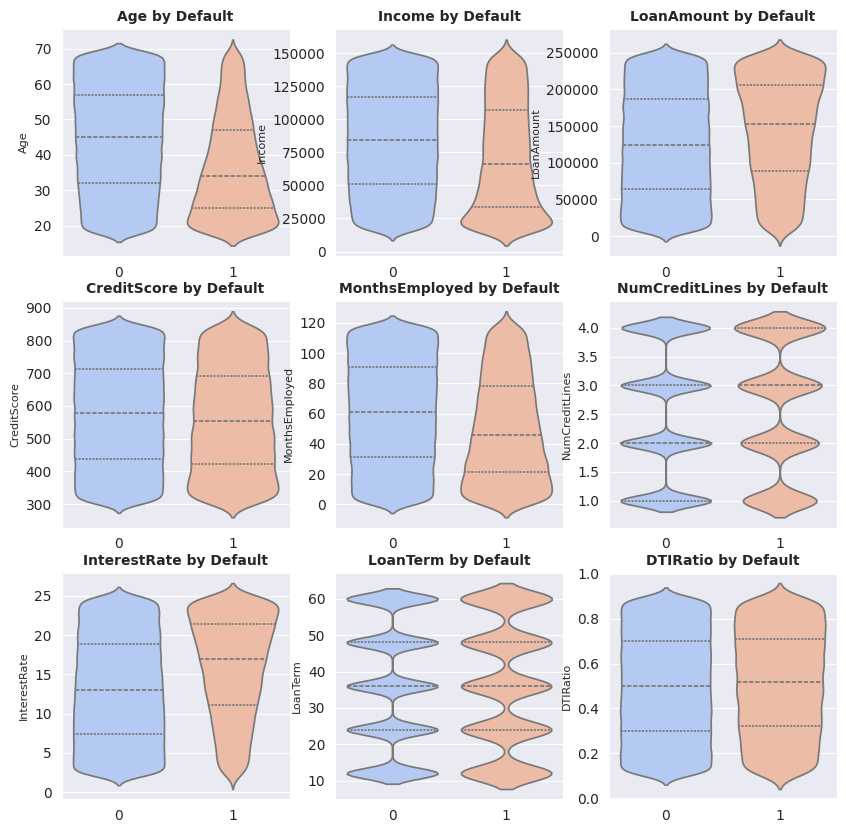

In [ ]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes = axes.flat

# Replace `num_cols` with your numerical columns
for i, col in enumerate(numerical_columns):
    sns.violinplot(data=data, x="Default", y=col, ax=axes[i], palette="coolwarm", inner="quartile")

    axes[i].set_title(f"{col} by Default", fontsize=10, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col, fontsize=8)

# Set overall title
fig.suptitle(
    "Distribution of quantitative variables according to the target variable (Default)",
    fontsize=12,
    fontweight="bold",
    color="darkblue"
)
fig.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

Here we can see that the graphs that look most alike are the NumCreditLines , LoanTerm and CreditScore

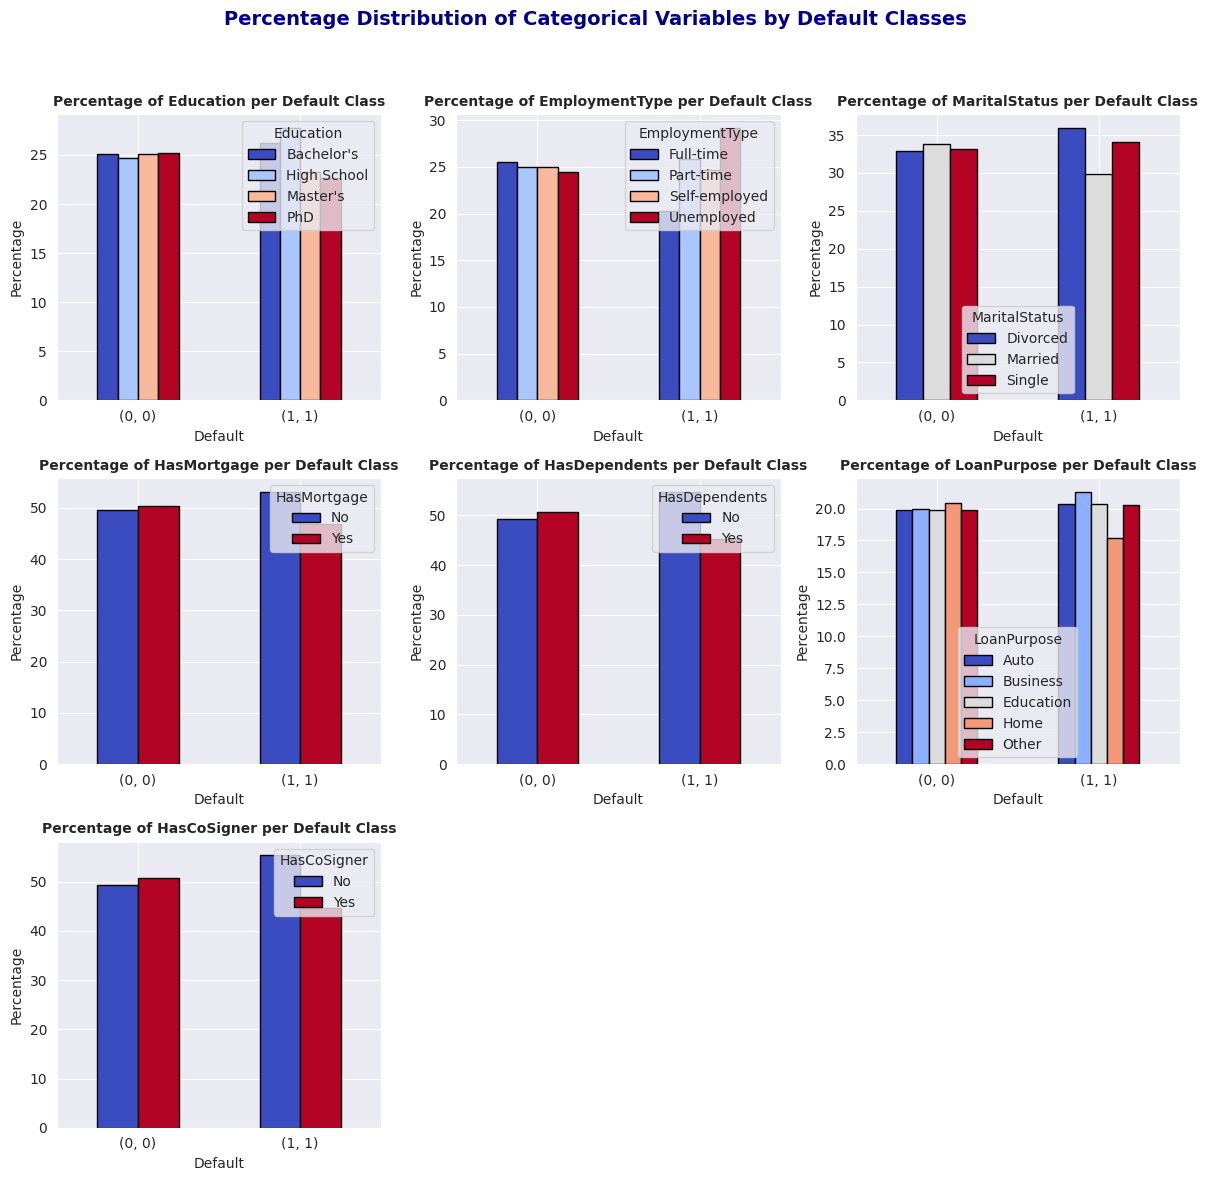

In [ ]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
axes = axes.flat

for i, col in enumerate(categorical_values):
    # Calculate percentages per class of Default
    percent_data = (
        data.groupby(['Default', col]).size()
        .groupby(level=0).apply(lambda x: x / x.sum() * 100)
        .unstack(fill_value=0)
    )
    
    # Plot grouped bar plot
    percent_data.plot(kind='bar', stacked=False, ax=axes[i], colormap="coolwarm", edgecolor='black')
    
    # Formatting
    axes[i].set_title(f"Percentage of {col} per Default Class", fontsize=10, fontweight="bold")
    axes[i].set_xlabel("Default")
    axes[i].set_ylabel("Percentage")
    axes[i].tick_params(axis='x', rotation=0)  # Default class on x-axis

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set overall title
fig.suptitle(
    "Percentage Distribution of Categorical Variables by Default Classes",
    fontsize=14,
    fontweight="bold",
    color="darkblue"
)
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title
plt.show()


Here almost all the graphs look different if we compareing the ones that deafulted and the ones that didnt , making the categorical values of importance

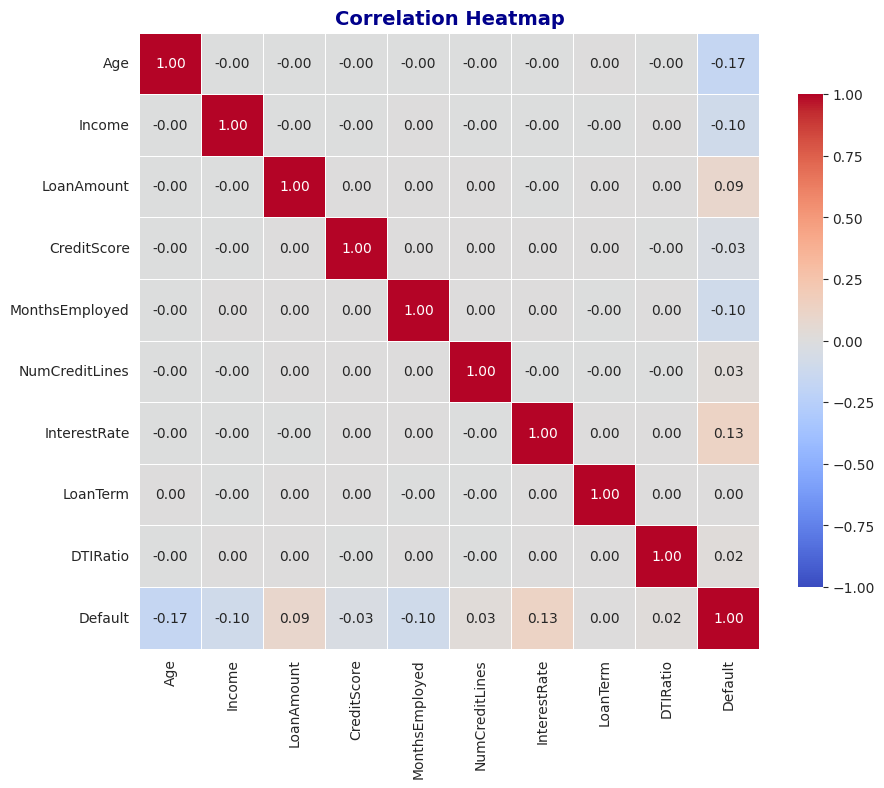

In [ ]:

# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Display correlation values
    fmt=".2f",  # Format correlation values to two decimal places
    cmap="coolwarm",  # Color map
    vmin=-1, vmax=1,  # Correlation ranges from -1 to 1
    linewidths=0.5,  # Add gridlines between cells
    cbar_kws={"shrink": 0.8}  # Shrink colorbar size
)

# Add title
plt.title("Correlation Heatmap", fontsize=14, fontweight="bold", color="darkblue")

plt.show()


### Feature Extraction

From the above very brief exploration we can determine that the features that might be safe to drop are:

1. LoanTerm
2. Number of credit lines
3. Credit Score